<a href="https://colab.research.google.com/github/Priyanshushaw1/ML-assignment/blob/main/Priyanshushaw1/ML-assignment/code/14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

vehicles_df = pd.read_csv('cars_clus.csv')
print(vehicles_df.head())

  manufact    model   sales  resale   type   price engine_s horsepow wheelbas  \
0    Acura  Integra  16.919  16.360  0.000  21.500    1.800  140.000  101.200   
1    Acura       TL  39.384  19.875  0.000  28.400    3.200  225.000  108.100   
2    Acura       CL  14.114  18.225  0.000  $null$    3.200  225.000  106.900   
3    Acura       RL   8.588  29.725  0.000  42.000    3.500  210.000  114.600   
4     Audi       A4  20.397  22.255  0.000  23.990    1.800  150.000  102.600   

    width   length curb_wgt fuel_cap     mpg lnsales  partition  
0  67.300  172.400    2.639   13.200  28.000   2.828        0.0  
1  70.300  192.900    3.517   17.200  25.000   3.673        0.0  
2  70.600  192.000    3.470   17.200  26.000   2.647        0.0  
3  71.400  196.600    3.850   18.000  22.000   2.150        0.0  
4  68.200  178.000    2.998   16.400  27.000   3.015        0.0  


In [2]:
print(vehicles_df.isnull().sum())

manufact     2
model        0
sales        0
resale       0
type         0
price        0
engine_s     0
horsepow     0
wheelbas     0
width        0
length       0
curb_wgt     0
fuel_cap     0
mpg          0
lnsales      0
partition    0
dtype: int64


In [3]:
print(vehicles_df.dtypes)

manufact      object
model         object
sales         object
resale        object
type          object
price         object
engine_s      object
horsepow      object
wheelbas      object
width         object
length        object
curb_wgt      object
fuel_cap      object
mpg           object
lnsales       object
partition    float64
dtype: object


In [5]:
categorical_cols = []

vehicles_encoded = pd.get_dummies(vehicles_df, columns=categorical_cols)

In [8]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Select numeric columns after encoding, dropping any missing values
X = vehicles_encoded.drop(columns=['model', 'manufact'])  # drop model and manufact columns

# Replace '$null$' with NaN and then drop rows with NaN
X = X.replace('$null$', np.nan)
X = X.dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:

import numpy as np

if X_scaled.shape[0] > 500:
    np.random.seed(42)
    sampled_indices = np.random.choice(X_scaled.shape[0], size=500, replace=False)
    X_sampled = X_scaled[sampled_indices]
else:
    X_sampled = X_scaled

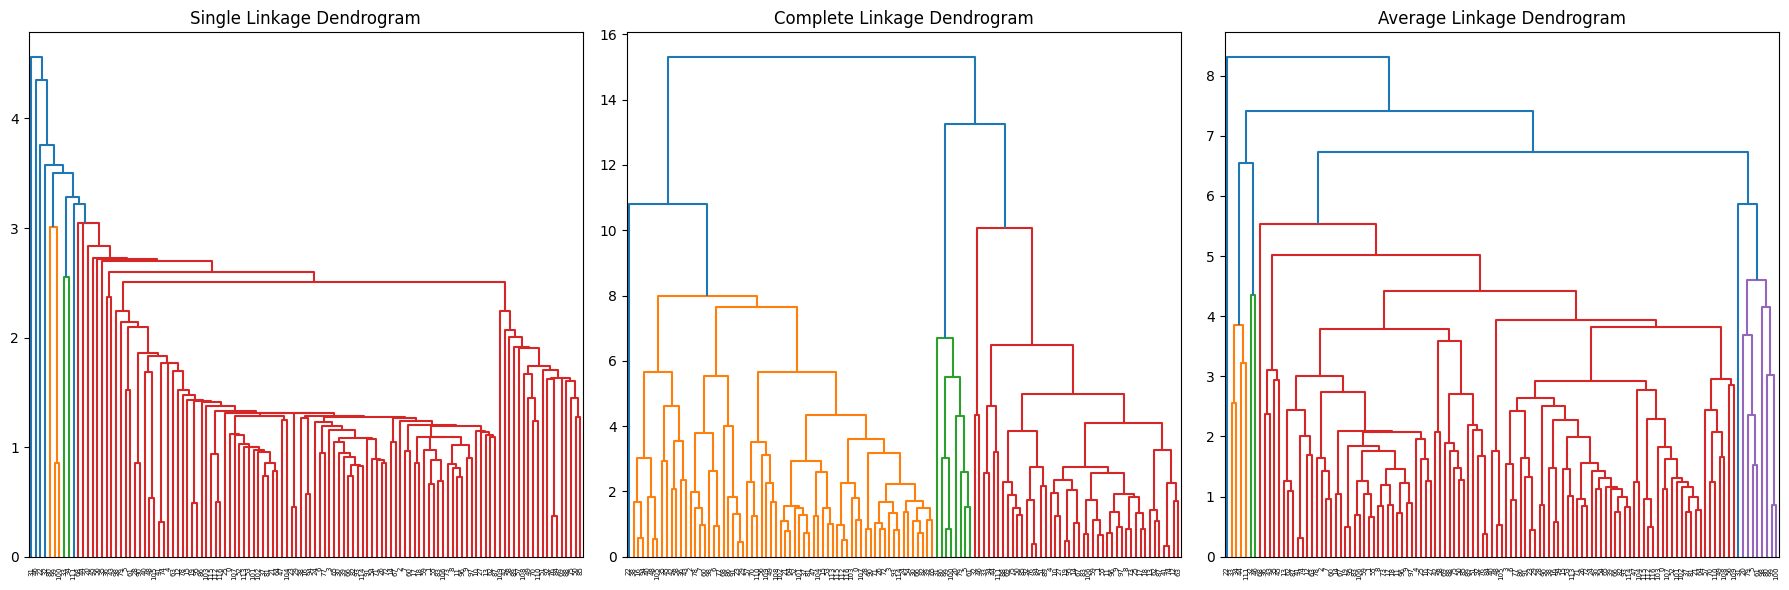

In [13]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import numpy as np

if X_scaled.shape[0] > 500:
    np.random.seed(42)
    sampled_indices = np.random.choice(X_scaled.shape[0], size=500, replace=False)
    X_sampled = X_scaled[sampled_indices]
else:
    X_sampled = X_scaled

linkage_methods = ['single', 'complete', 'average']

plt.figure(figsize=(18, 6))
for i, method in enumerate(linkage_methods, 1):
    linked = linkage(X_sampled, method=method)
    plt.subplot(1, 3, i)
    dendrogram(linked)
    plt.title(f'{method.capitalize()} Linkage Dendrogram')

plt.tight_layout()
plt.show()


In [14]:
from sklearn.cluster import AgglomerativeClustering

for method in linkage_methods:
    agg = AgglomerativeClustering(n_clusters=5, linkage=method)
    labels = agg.fit_predict(X_scaled)
    print(f'{method.capitalize()} linkage cluster labels (first 10): {labels[:10]}')

Single linkage cluster labels (first 10): [0 0 0 0 0 0 0 0 0 0]
Complete linkage cluster labels (first 10): [0 1 0 0 1 2 0 0 1 1]
Average linkage cluster labels (first 10): [1 1 1 1 1 0 1 1 1 1]
